
# Project: Investigate a Dataset (TMDB  Movie Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.
<p>Research Questions:</p>
<em>1- Which genres are most popular from year to year?</em>
<em>2-  What kinds of properties are associated with movies that have high revenues?</em>


In [26]:
#import packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [27]:
#read data
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [28]:
#size data
df.shape

(10866, 21)

In [29]:
#summary staistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [30]:
#info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [31]:
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [32]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Missing value in geners)

In [33]:
#check for null values in geners because,i used it to answer my question "(Which genres are most popular from year to year? later"
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [34]:
#copy dataframe
df1=df.copy()
df1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [35]:

#convert release_date  to datetime
df1['release_date'] =pd.to_datetime(df1['release_date'])

In [36]:
#drop null data geners
df1.dropna(subset=['genres'], how='all', inplace=True)


In [37]:
#check data after cleaning
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10843 non-null  int64         
 1   imdb_id               10835 non-null  object        
 2   popularity            10843 non-null  float64       
 3   budget                10843 non-null  int64         
 4   revenue               10843 non-null  int64         
 5   original_title        10843 non-null  object        
 6   cast                  10768 non-null  object        
 7   homepage              2931 non-null   object        
 8   director              10801 non-null  object        
 9   tagline               8037 non-null   object        
 10  keywords              9368 non-null   object        
 11  overview              10840 non-null  object        
 12  runtime               10843 non-null  int64         
 13  genres          

In [39]:
#check data there is no null values
df1[df1.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [40]:
#save clean data to excel sheet
df1.to_csv('tmdb-movies_cleaned.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

In [41]:
#sort data 
df1[["genres", "release_year", "popularity"]].sort_values(["release_year","popularity"], ascending=False)


,genres,release_year,popularity
0,Action|Adventure|Science Fiction|Thriller,2015,32.985763
1,Action|Adventure|Science Fiction|Thriller,2015,28.419936
2,Adventure|Science Fiction|Thriller,2015,13.112507
3,Action|Adventure|Science Fiction|Fantasy,2015,11.173104
4,Action|Crime|Thriller,2015,9.335014
...,...,...,...
10167,Horror|Science Fiction,1960,0.127219
10168,Comedy|Family,1960,0.114188
10169,Horror,1960,0.110511
10171,Horror,1960,0.065808


In [42]:
#drop dublicated
geners_popularity=df1[["genres", "release_year", "popularity"]].sort_values(["release_year","popularity"], ascending=False).drop_duplicates(subset="release_year")
geners_popularity

,genres,release_year,popularity
0,Action|Adventure|Science Fiction|Thriller,2015,32.985763
629,Adventure|Drama|Science Fiction,2014,24.949134
5422,Animation|Adventure|Family,2013,6.112766
4361,Science Fiction|Action|Adventure,2012,7.637767
3371,Action|Animation|Horror,2011,8.411577
1919,Action|Thriller|Science Fiction|Mystery|Adventure,2010,9.363643
1386,Action|Adventure|Fantasy|Science Fiction,2009,9.432768
2875,Drama|Action|Crime|Thriller,2008,8.466668
7387,Adventure|Fantasy|Action,2007,4.965391
6554,Fantasy|Action|Science Fiction|Thriller,2006,5.838503


In [43]:
 """
        The function to take one of most  geners  in year
        Parameters:
            string (geners): the column that split from pipeline | 
            
   """
def get_one_from_geners(geners):
     return geners.split('|')[0]

In [44]:
#choose one of generes most popular and assign to new column
geners_popularity['one_genre']=geners_popularity['genres'].apply(lambda x:get_one_from_geners(x))
geners_popularity

,genres,release_year,popularity,one_genre
0,Action|Adventure|Science Fiction|Thriller,2015,32.985763,Action
629,Adventure|Drama|Science Fiction,2014,24.949134,Adventure
5422,Animation|Adventure|Family,2013,6.112766,Animation
4361,Science Fiction|Action|Adventure,2012,7.637767,Science Fiction
3371,Action|Animation|Horror,2011,8.411577,Action
1919,Action|Thriller|Science Fiction|Mystery|Adventure,2010,9.363643,Action
1386,Action|Adventure|Fantasy|Science Fiction,2009,9.432768,Action
2875,Drama|Action|Crime|Thriller,2008,8.466668,Drama
7387,Adventure|Fantasy|Action,2007,4.965391,Adventure
6554,Fantasy|Action|Science Fiction|Thriller,2006,5.838503,Fantasy


In [45]:
   """
        The function to draw relationship between two variables x,y 
        Parameters:
            string (xcolumn): the column from dataset on x axis.
            string (ycolumn): the column from dataset on y axis.
            string (title): the title for reationship .
            string (xlabel): the label that showed on x axis .
            string (ylabel): the label that showed on y axis .  
            df (dataframe) :optional parameter if none assign to df1
   """
def draw_scatter(xcolumn,ycolumn,title,xlabel,ylabel,dataframe=df1):
    dataframe.plot(x=xcolumn,y=ycolumn,kind='scatter')
    plt.title(title);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(labels=[ylabel])

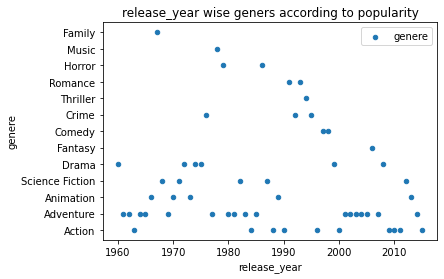

In [46]:
#decribe one of the  most popular generes from year to other 
draw_scatter('release_year','one_genre',"release_year wise geners according to popularity",'release_year','genere',geners_popularity)


<h5> this  clearly shows highest values family is most popular in old years from 1965 to 1990 
    
then decrease in recent years from 1990 to 2015
</h5>

### Research Question 2  ( What kinds of properties are associated with movies that have high revenues? )

<p> check some columns effected to revenue by graphs like vote_no,vote_average,runtime... and so on </p>

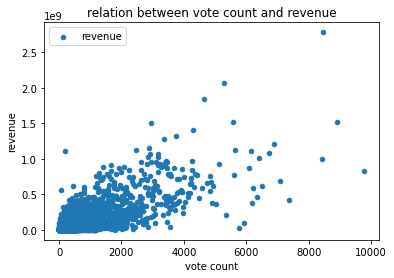

In [47]:
#decribe if vote count affect on revenue
draw_scatter('vote_count','revenue',"relation between vote count and revenue",'vote count','revenue')


In [58]:
df1[['vote_count','revenue']].corr()

,vote_count,revenue
vote_count,1.000000,0.791123
revenue,0.791123,1.000000


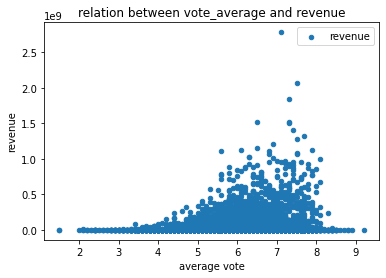

In [49]:
#decribe if vote average affects on revenue
draw_scatter('vote_average','revenue',"relation between vote_average and revenue",'average vote','revenue')



<h5> there is positive corelations between votes and revenue
</h5>

<h5>describtive statistic numeric and categorical data  for high revenue </h5>

In [52]:
top_revenue = df1.query('revenue > revenue.mean()')
top_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2169.000000,2169.000000,2.169000e+03,2.169000e+03,2169.000000,2169.000000,2169.000000,2169.000000,2.169000e+03,2.169000e+03
mean,37229.901337,1.624907,5.203740e+07,1.838336e+08,112.665745,814.924850,6.288843,2001.875058,6.001727e+07,2.320238e+08
std,66482.180180,1.784144,4.860672e+07,2.058552e+08,23.951526,1060.316439,0.734341,10.675548,5.039888e+07,2.507119e+08
min,11.000000,0.010335,0.000000e+00,3.994678e+07,44.000000,10.000000,3.400000,1960.000000,0.000000e+00,3.693575e+07
25%,2322.000000,0.737768,1.800000e+07,6.646833e+07,98.000000,192.000000,5.800000,1996.000000,2.403643e+07,8.357833e+07
50%,10030.000000,1.161942,3.800000e+07,1.130203e+08,109.000000,422.000000,6.300000,2004.000000,4.617782e+07,1.458037e+08
75%,36819.000000,1.888746,7.000000e+07,2.139543e+08,123.000000,971.000000,6.800000,2010.000000,8.297469e+07,2.775049e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [53]:

top_revenue = df1.query('revenue > revenue.mean()')
top_revenue.describe(include='all')


<ipython-input-53-c00d12105908>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  top_revenue.describe(include='all')


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2169.000000,2169,2169.000000,2.169000e+03,2.169000e+03,2169,2169,924,2169,2104,...,2169,2169.000000,2169,2166,2169,2169.000000,2169.000000,2169.000000,2.169000e+03,2.169000e+03
unique,NaN,2169,NaN,NaN,NaN,2144,2148,902,931,2097,...,2169,NaN,743,1674,1834,NaN,NaN,NaN,NaN,NaN
top,NaN,tt0097481,NaN,NaN,NaN,Teenage Mutant Ninja Turtles,William Shatner|Leonard Nimoy|DeForest Kelley|...,http://www.missionimpossible.com/,Steven Spielberg,Worlds Collide,...,"Joel Barish, heartbroken that his girlfriend u...",NaN,Comedy,Paramount Pictures,2013-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,2,5,4,25,2,...,1,NaN,152,56,4,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1971-01-15 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2070-12-24 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,37229.901337,NaN,1.624907,5.203740e+07,1.838336e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,112.665745,NaN,NaN,NaN,814.924850,6.288843,2001.875058,6.001727e+07,2.320238e+08
std,66482.180180,NaN,1.784144,4.860672e+07,2.058552e+08,NaN,NaN,NaN,NaN,NaN,...,NaN,23.951526,NaN,NaN,NaN,1060.316439,0.734341,10.675548,5.039888e+07,2.507119e+08
min,11.000000,NaN,0.010335,0.000000e+00,3.994678e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,44.000000,NaN,NaN,NaN,10.000000,3.400000,1960.000000,0.000000e+00,3.693575e+07
25%,2322.000000,NaN,0.737768,1.800000e+07,6.646833e+07,NaN,NaN,NaN,NaN,NaN,...,NaN,98.000000,NaN,NaN,NaN,192.000000,5.800000,1996.000000,2.403643e+07,8.357833e+07


<h5>decribe if vote year affects on total revenue from year to year and in which year has achieved high revenue</h5>

In [59]:
#sum revenue in each year
res=df1.groupby('release_year', sort = False).revenue.sum()
res

release_year
2015    26762450518
2014    24331150183
1977     2180583159
2009    22180170559
2010    21959998545
1999    11355712579
2001    13410083139
2008    19431695138
2011    23695591578
2002    14643618528
1994     7095429177
2012    24668428824
2003    15138243542
1997    10655173234
2013    24703633017
1985     2875772392
2005    16516835108
2006    16275739385
2004    16793822618
1972      494730171
1980     1768662387
2007    19411668670
1979     1684794913
1984     2635524418
1983     2307529320
1995     9156341160
1992     6078153217
1981     1774606236
1996     8311492279
2000    10978701012
1982     2458443852
1998     9493174938
1989     5164923718
1991     4706599796
1988     3739550845
1987     3462104847
1968      264732980
1974      812539818
1975      957489966
1962      215579846
1964      340981782
1971      404910610
1990     5315166660
1961      337720188
1960      145005000
1976      801005600
1993     6955151167
1967      737834637
1963      187404989
1986   

In [55]:
years=df['release_year'].unique().tolist()
years

[2015,
 2014,
 1977,
 2009,
 2010,
 1999,
 2001,
 2008,
 2011,
 2002,
 1994,
 2012,
 2003,
 1997,
 2013,
 1985,
 2005,
 2006,
 2004,
 1972,
 1980,
 2007,
 1979,
 1984,
 1983,
 1995,
 1992,
 1981,
 1996,
 2000,
 1982,
 1998,
 1989,
 1991,
 1988,
 1987,
 1968,
 1974,
 1975,
 1962,
 1964,
 1971,
 1990,
 1961,
 1960,
 1976,
 1993,
 1967,
 1963,
 1986,
 1973,
 1970,
 1965,
 1969,
 1978,
 1966]

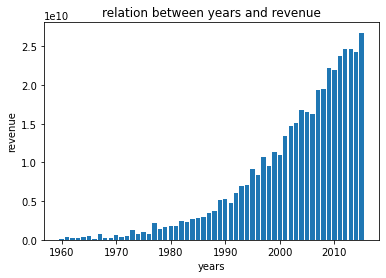

In [56]:

plt.bar(years, res)
plt.xlabel("years")
plt.ylabel("revenue")
plt.title("relation between years and revenue");


<h5>  
 in recent release years Revenus are increased
</h5>

<h2>Conclusions<a class="anchor-link" href="#Conclusions">¶</a>
</h2>
<ul>
       <li>the most popular films in 2015  are (Action|Adventure|Science Fiction|Thrille)</li>
      <li>
          there are avery strong relation between  vote_count and  revenue and revenue increases at last 15 years
      </li>
      <li></li>
    <li> the geners top  film is comedy and the top of company is  Paramount Pictures in  high revenue</li>
    
 
</ul>
<h1>Limitations:<a class="anchor-link" href="#Limitations:">¶</a>
</h1>
<p>there are some missing data i cannot fill it like cast in film and keywords </p>

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1